In [3]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Importing the dataset.
df = pd.read_csv("C:/Users/Susmitha/Downloads/survey.csv")

In [6]:
# Describing the dataset.
df.head()

print("   ")

df.dtypes

print("   ")

df.isnull().sum()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

##### Comments column have lot of null values as it's an optional text box and many of them may leave it blank. Timestamp column is also not required because it contains time when the respondent took the questionnaire. State column has lot of null values.

In [7]:
df['Country'].value_counts()
print("   ")
df['state'].unique()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

##### It will be really misleading to conclude that one country faces more problem with mental health of employees as 60% of people are from US.

In [8]:
# Let's drop Timestamp,Country,state,comments columns.
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'],inplace=True)

## Data Preparation and Feature Engineering.

In [9]:
print("Different age groups used in the dataset : ")
df['Age'].unique()
print("Different gender notations used in the dataset :")
df['Gender'].unique()

Different age groups used in the dataset : 


array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

Different gender notations used in the dataset :


array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

##### How can age be negative? And how can the age be less than 20? Are they allowed to even work?

##### Regarding the gender column Males and Females have described themselves in so many different ways. This is what happens when we don't have check boxes or radio buttons while taking surveys.

In [10]:
df.drop(df[df['Age'] < 20].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 28, 26, 22, 25, 45, 21, 43, 56, 60, 54, 55, 48, 20, 57,
       58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

In [11]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman'], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman'], 'Other', inplace = True)

df['Gender'].value_counts()

Male      973
Female    246
Other      16
Name: Gender, dtype: int64

##### From this output we can conclude that number of males in tech industry are more when compared to females.

## Exploratory Data Analysis

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Get Treatment of Survey Respondents')

Text(0.0, 0.5161943319838057, '51%')

Text(1.0, 0.5038056680161943, '49%')

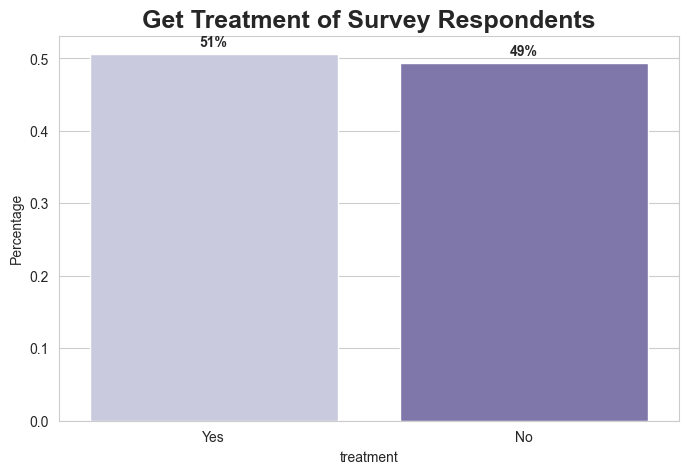

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

##### From this graph we can infer the percentage of respondents who wants to get treatment is 50%. If employees have good mental health they can : Be more productive, Take active participation in employee engagement activities etc.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.9018241577649959, '88%')

Text(1.0, 0.11817584223500412, '12%')

Text(0.5, 1.0, 'Employment Type of the Employees')

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: >

<Axes: xlabel='self_employed'>

Text(0.5, 1.0, 'Employment Type of the Employees who are seeking Treatment')

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

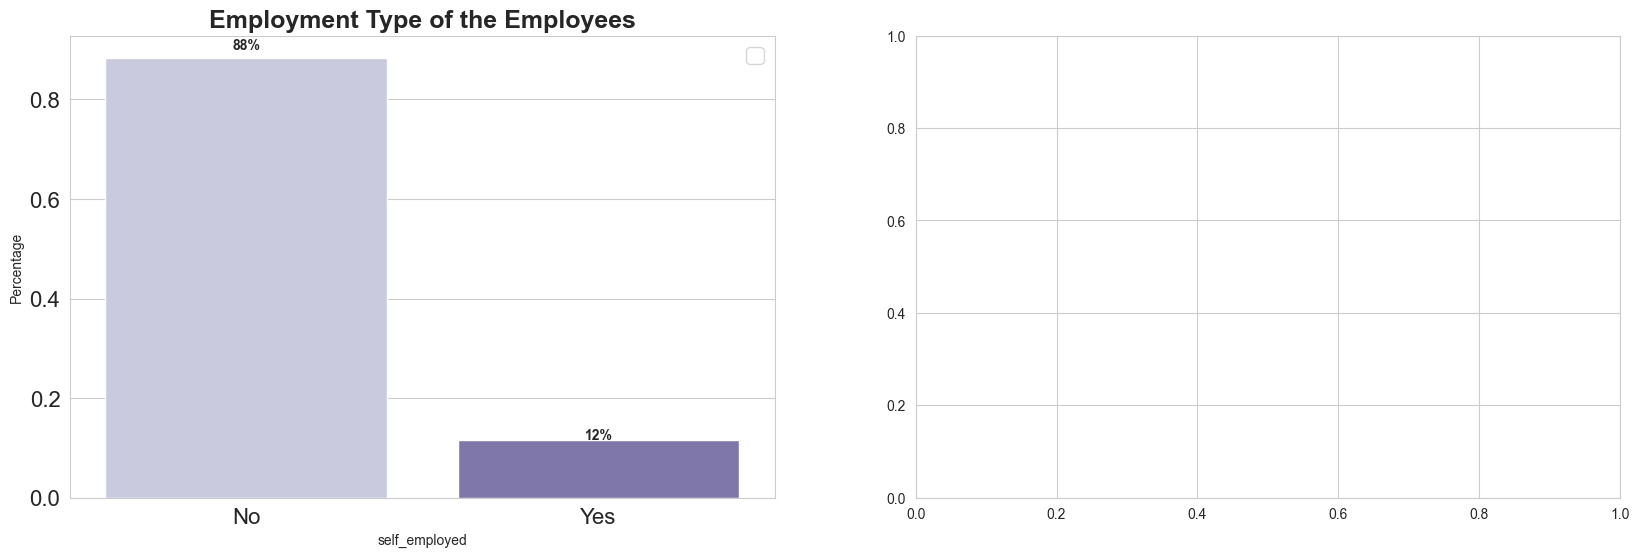

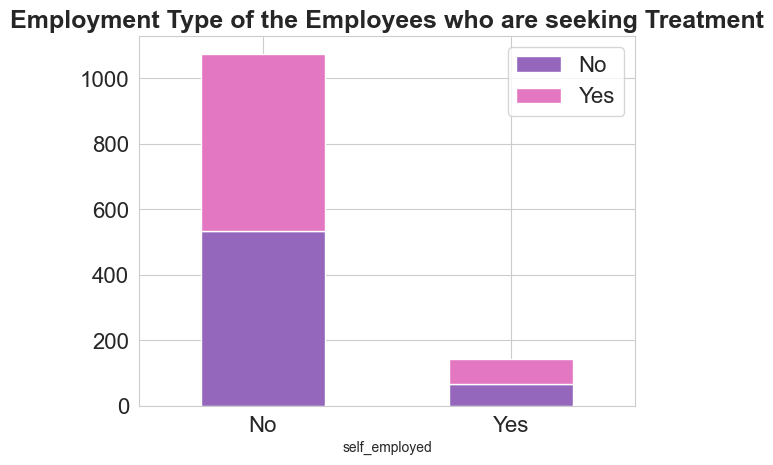

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# First subplot: Employment type distribution
plt.subplot(1, 2, 1)
eda_percentage = df['self_employed'].value_counts(normalize=True).rename_axis('self_employed').reset_index(name='Percentage')
ax = sns.barplot(x='self_employed', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employment Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Second subplot: Employment type of employees seeking treatment
plt.subplot(1, 2, 2)
treatment_counts = df.pivot_table(index='self_employed', columns='treatment', aggfunc='size', fill_value=0)
treatment_counts.plot(kind='bar', stacked=True, color=['#9467bd', '#e377c2'])
plt.title('Employment Type of the Employees who are seeking Treatment', fontsize=18, fontweight='bold')
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

##### Most of the working class employees responded to the survey when compared to working class. But we can observe from the second graph that both classes have same percentage of people who are seeking treatment.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.51, '50%')

Text(1.0, 0.51, '50%')

Text(0.5, 1.0, 'Family History of Survey Respondents')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

<Axes: >

<Axes: xlabel='family_history', ylabel='count'>

Text(0.5, 1.0, 'Family History of Survey Respondents')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


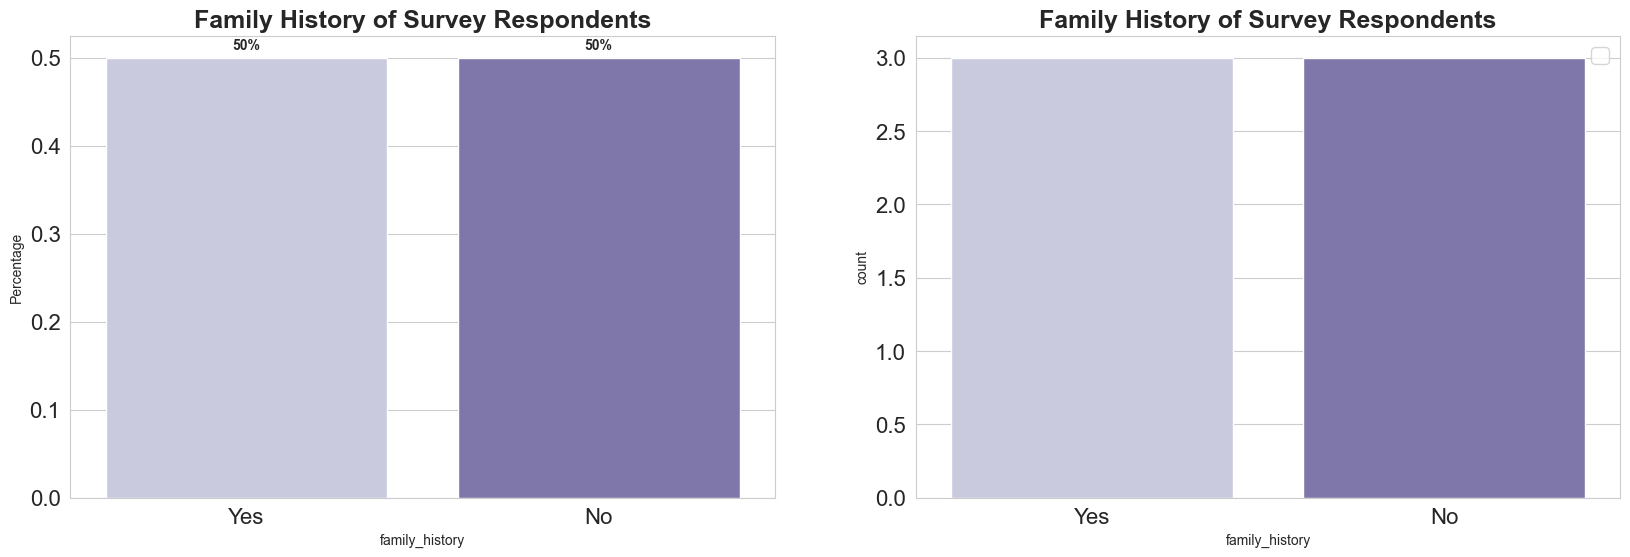

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is defined with appropriate data
# Define a DataFrame with sample data
data = {'family_history': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
        'treatment': ['A', 'B', 'B', 'A', 'A', 'B']}
df = pd.DataFrame(data)

# Now you can use df to create your plots
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
ax = sns.barplot(x='family_history', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='family_history', data=df, palette='Purples')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

plt.show()

##### Family history is the major risk factor for many mental health disorders.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.40800000000000003, '40%')

Text(1.0, 0.20400000000000001, '20%')

Text(2.0, 0.20400000000000001, '20%')

Text(3.0, 0.20400000000000001, '20%')

Text(0.5, 1.0, 'Work Interference of Survey Respondents')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Often'),
  Text(1, 0, 'Rarely'),
  Text(2, 0, 'Sometimes'),
  Text(3, 0, 'Never')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45')])

<Axes: >

<Axes: xlabel='work_interfere', ylabel='count'>

Text(0.5, 1.0, 'Work Interference of Survey Respondents')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Often'),
  Text(1, 0, 'Rarely'),
  Text(2, 0, 'Sometimes'),
  Text(3, 0, 'Never')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

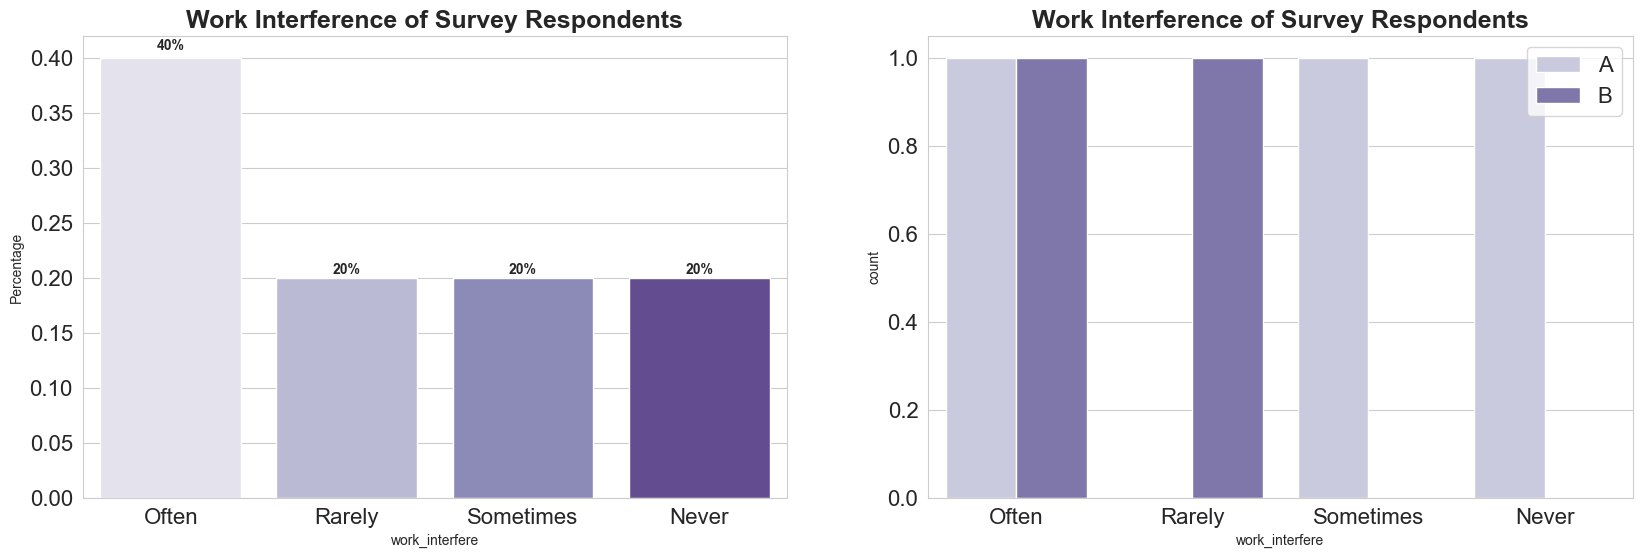

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a DataFrame with sample data
data = {'work_interfere': ['Often', 'Rarely', 'Sometimes', 'Often', 'Never'],
        'treatment': ['A', 'B', 'A', 'B', 'A']}
df = pd.DataFrame(data)

# Now you can use df to create your plots
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['work_interfere'].value_counts(normalize=True).rename_axis('work_interfere').reset_index(name='Percentage')
ax = sns.barplot(x='work_interfere', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', hue='treatment', data=df, palette='Purples')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

plt.show()

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.612, '60%')

Text(1.0, 0.40800000000000003, '40%')

Text(0.5, 1.0, 'Working Type of Survey Respondents')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

<Axes: >

<Axes: xlabel='remote_work', ylabel='count'>

Text(0.5, 1.0, 'Working Type of Survey Respondents')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

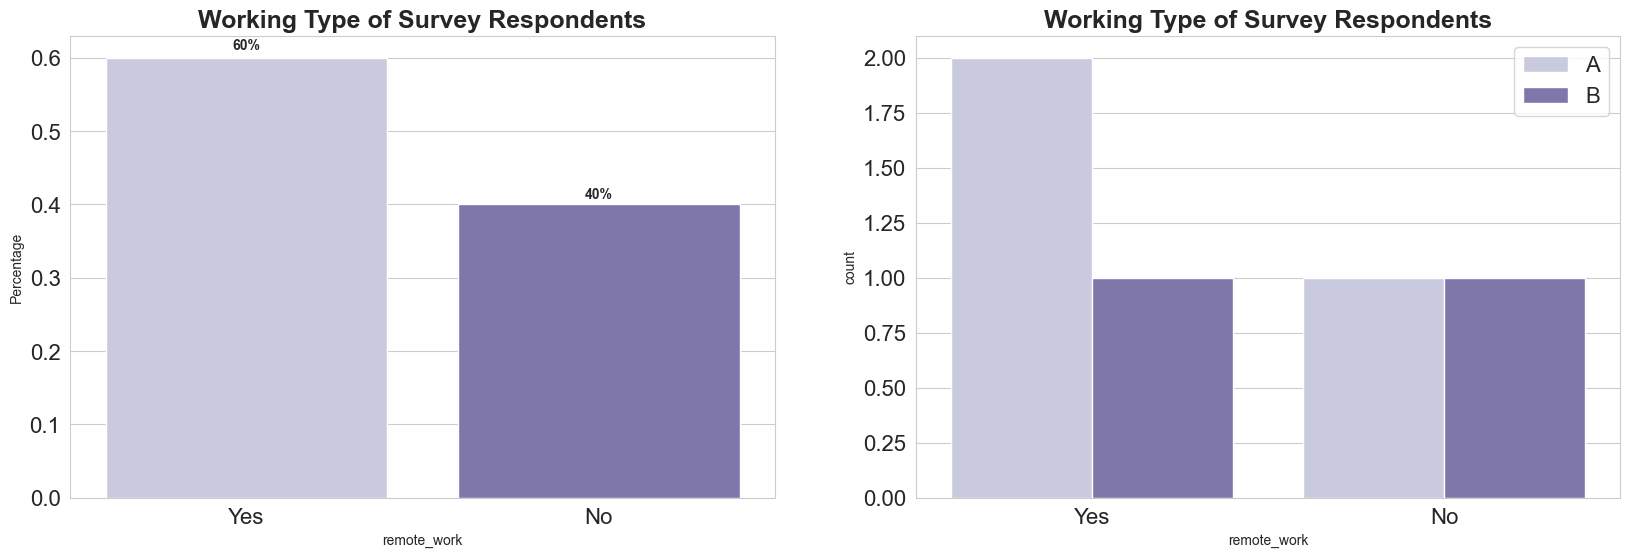

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a DataFrame with sample data
data = {'remote_work': ['Yes', 'No', 'Yes', 'No', 'Yes'],
        'treatment': ['A', 'B', 'B', 'A', 'A']}
df = pd.DataFrame(data)

# Now you can use df to create your plots
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['remote_work'].value_counts(normalize=True).rename_axis('remote_work').reset_index(name='Percentage')
ax = sns.barplot(x='remote_work', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='remote_work', hue='treatment', data=df, palette='Purples')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

plt.show()

##### Around 70 percent of employees don't work remotely hence most of the mental health issues occurs at workplace. Number of employees seeking treatment in both the categories are more or like equal.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.612, '60%')

Text(1.0, 0.40800000000000003, '40%')

Text(0.5, 1.0, 'Company Category of Survey Respondents')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

<Axes: >

<Axes: xlabel='tech_company', ylabel='count'>

Text(0.5, 1.0, 'Company Category of Survey Respondents')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

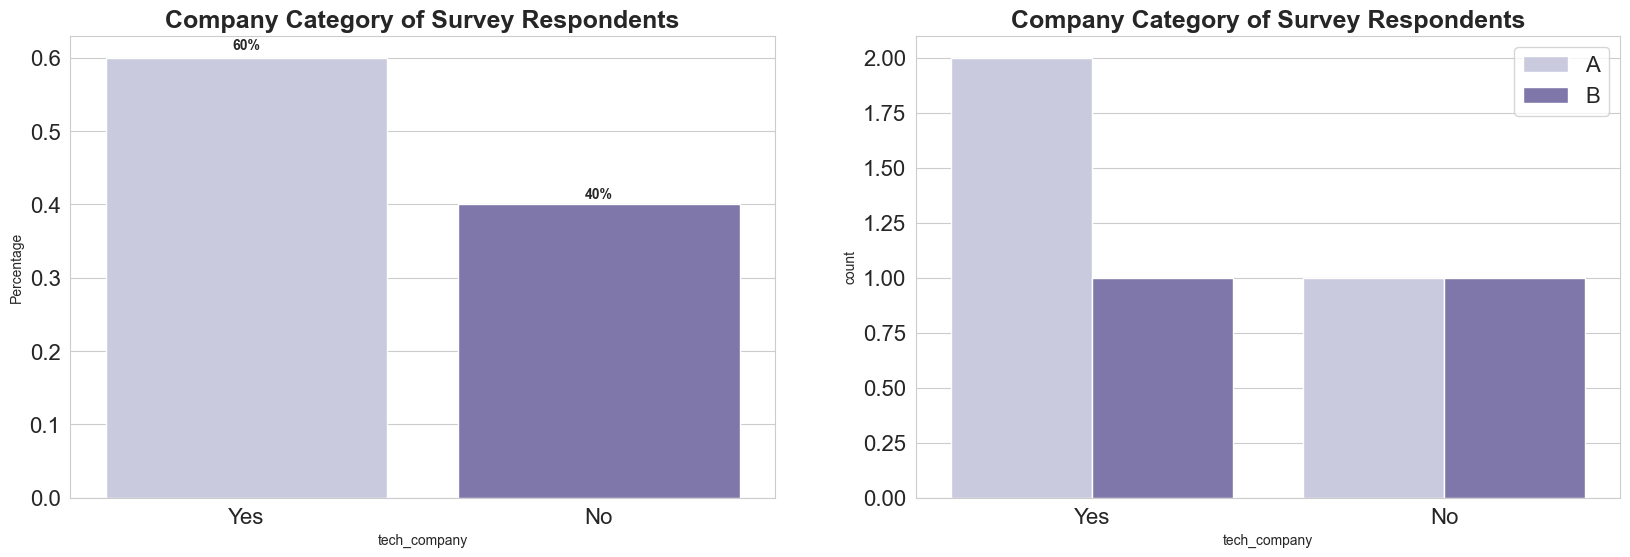

In [17]:
# Define a DataFrame with sample data
data = {'tech_company': ['Yes', 'No', 'Yes', 'No', 'Yes'],
        'treatment': ['A', 'B', 'B', 'A', 'A']}
df = pd.DataFrame(data)


plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
eda_percentage = df['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
ax = sns.barplot(x='tech_company', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='tech_company', hue='treatment', data=df, palette='Purples')
plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

##### Although the survey is designed to be conducted in tech industry there are close to 18% people who are from non-tech industry. However people from tech industry who wants to get treatment are lesser when compared to non-tech industry.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.612, '60%')

Text(1.0, 0.40800000000000003, '40%')

Text(0.5, 1.0, 'Benefits provided to the Employees')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

<Axes: >

<Axes: xlabel='benefits', ylabel='count'>

Text(0.5, 1.0, 'Benefits provided to the Employees')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

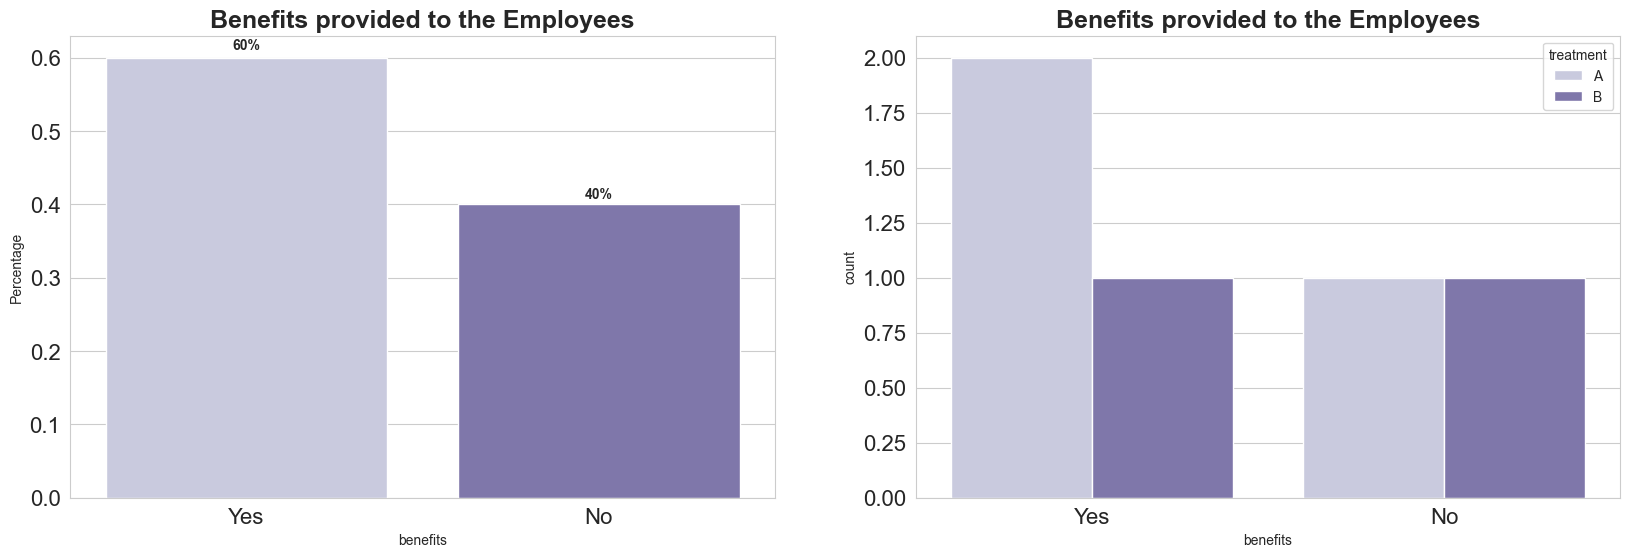

In [18]:
# Define a DataFrame with sample data
data = {'benefits': ['Yes', 'No', 'Yes', 'No', 'Yes'],
        'treatment': ['A', 'B', 'B', 'A', 'A']}
df = pd.DataFrame(data)


plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
eda_percentage = df['benefits'].value_counts(normalize=True).rename_axis('benefits').reset_index(name='Percentage')
ax = sns.barplot(x='benefits', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='benefits', hue='treatment', data=df, palette='Purples')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

##### We said that 38% of the respondents said that their employer provided them mental health benefits. Surprisingly 32% of the employers don't even know that they were provided with mental health benefits or not. 45% of the respondents from No category wants to seek mental health benefits.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.33999999999999997, '33%')

Text(1.0, 0.33999999999999997, '33%')

Text(2.0, 0.33999999999999997, '33%')

Text(0.5, 1.0, 'Mental Healthcare provided to the Employees')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

<Axes: >

<Axes: xlabel='care_options', ylabel='count'>

Text(0.5, 1.0, 'Mental Heathcare provided to the Employees')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

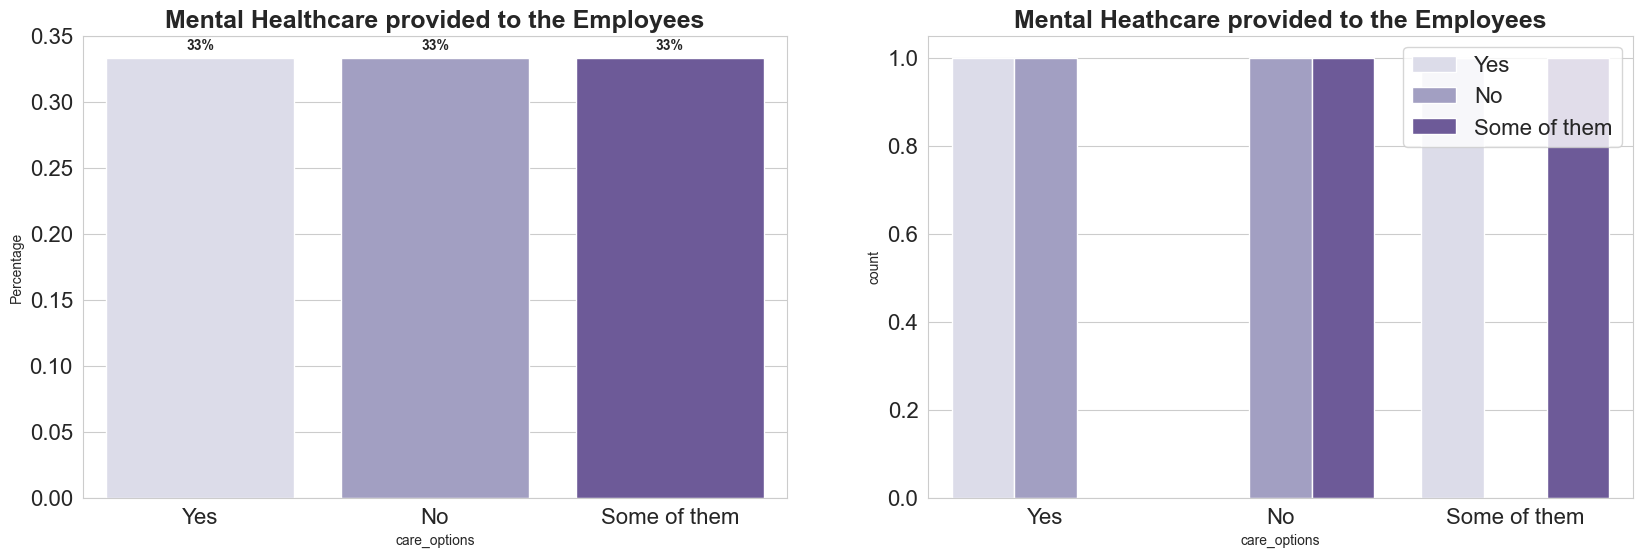

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a DataFrame with sample data
data = {'care_options': ['Yes', 'No', 'Some of them', 'Yes', 'Some of them', 'No'],
        'treatment': ['Yes', 'No', 'Yes', 'No', 'Some of them', 'Some of them']}
df = pd.DataFrame(data)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['care_options'].value_counts(normalize=True).rename_axis('care_options').reset_index(name='Percentage')
ax = sns.barplot(x='care_options', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['care_options'], hue=df['treatment'], palette='Purples')
plt.title('Mental Heathcare provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.612, '60%')

Text(1.0, 0.40800000000000003, '40%')

Text(0.5, 1.0, 'Mental Health in Wellness Program provided to the Employees')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

<Axes: >

<Axes: xlabel='wellness_program', ylabel='count'>

Text(0.5, 1.0, 'Mental Health in Wellness Program provided to the Employees')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

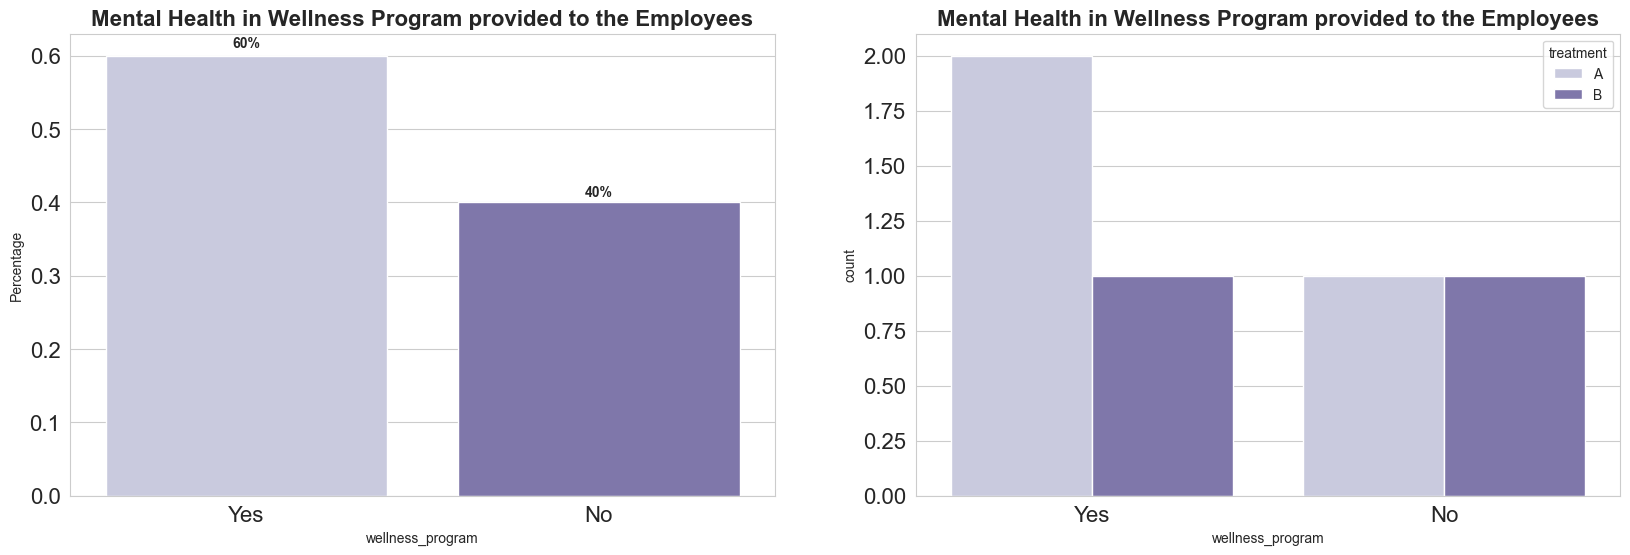

In [20]:
# Define a DataFrame with sample data
data = {'wellness_program': ['Yes', 'No', 'Yes', 'No', 'Yes'],
        'treatment': ['A', 'B', 'B', 'A', 'A']}
df = pd.DataFrame(data)



plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['wellness_program'].value_counts(normalize=True).rename_axis('wellness_program').reset_index(name='Percentage')
ax = sns.barplot(x='wellness_program', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x=df['wellness_program'], hue=df['treatment'], palette='Purples')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

##### More than 65% of people says that there are no wellness programs that are being conducted by their company. Close to half of the people from No category wants to get treatment which means their company needs to provide them.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert 'anonymity' column to numerical data
df['anonymity_encoded'] = label_encoder.fit_transform(df['anonymity'])

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize=True).rename_axis('anonymity').reset_index(name='Percentage')
ax = sns.barplot(x='anonymity', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['anonymity_encoded'], palette='Purples')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

KeyError: 'anonymity'

##### Most of the employees don't know that they are provided with anonymity whereas 30% people know anonymity is provided by the company out them 60 percent people are seeking help which shows they trust their company.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.40800000000000003, '40%')

Text(1.0, 0.20400000000000001, '20%')

Text(2.0, 0.20400000000000001, '20%')

Text(3.0, 0.20400000000000001, '20%')

Text(0.5, 1.0, 'Leave for Mental Health provided to the Employees')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Somewhat easy'),
  Text(1, 0, 'Very difficult'),
  Text(2, 0, 'Somewhat difficult'),
  Text(3, 0, 'Very easy')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45')])

<Axes: >

<Axes: xlabel='leave', ylabel='count'>

Text(0.5, 1.0, 'Leave for Mental Health provided to the Employees')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Somewhat easy'),
  Text(1, 0, 'Very difficult'),
  Text(2, 0, 'Somewhat difficult'),
  Text(3, 0, 'Very easy')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

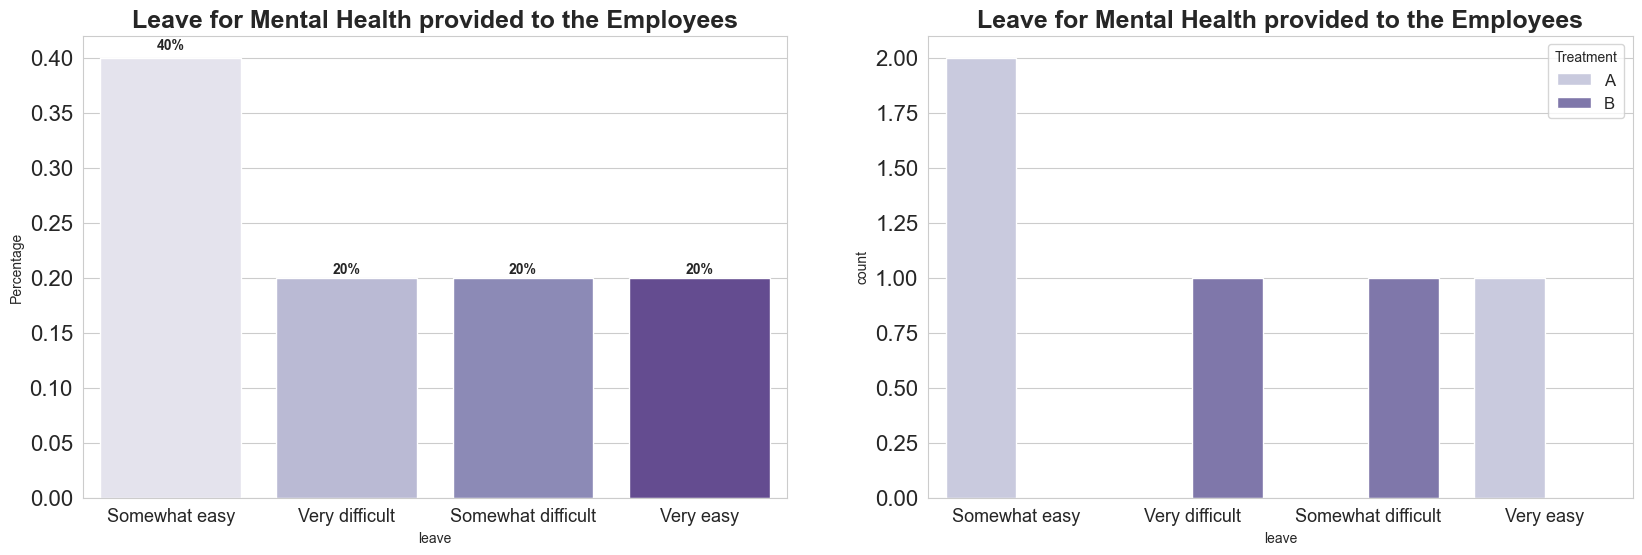

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a DataFrame with sample data
data = {'leave': ['Somewhat easy', 'Very difficult', 'Somewhat difficult', 'Very easy', 'Somewhat easy'],
        'treatment': ['A', 'B', 'B', 'A', 'A']}
df = pd.DataFrame(data)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize=True).rename_axis('leave').reset_index(name='Percentage')
ax = sns.barplot(x='leave', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='leave', data=df, hue='treatment', palette='Purples')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=12)

##### From this graph we can infer that most people get leave if they are suffering from mental health related issues.

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.612, '60%')

Text(1.0, 0.40800000000000003, '40%')

Text(0.5, 1.0, 'Consequence of discussing Mental Health with Employer')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

<Axes: >

<Axes: xlabel='mental_health_consequence', ylabel='count'>

Text(0.5, 1.0, 'Consequence of discussing Mental Health with Employer')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

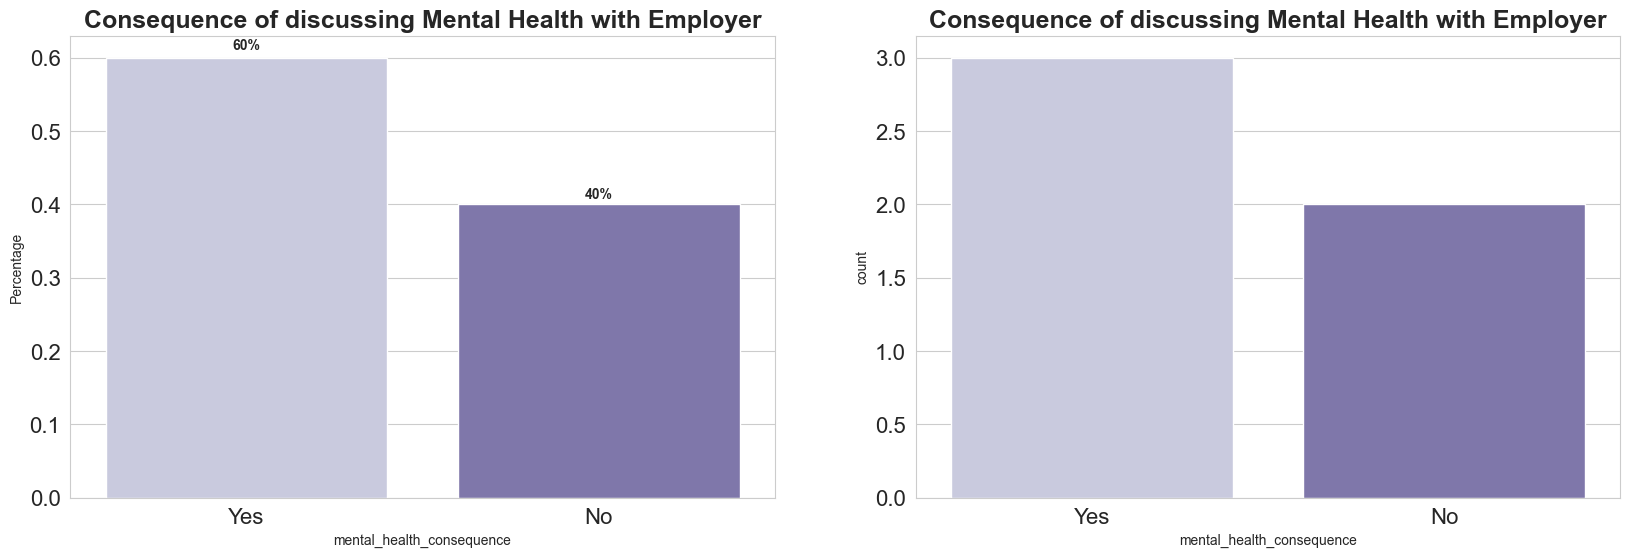

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a DataFrame with sample data
data = {'mental_health_consequence': ['Yes', 'No', 'Yes', 'No', 'Yes']}
df = pd.DataFrame(data)

# Convert 'mental_health_consequence' column to categorical data type
df['mental_health_consequence'] = pd.Categorical(df['mental_health_consequence'], categories=['Yes', 'No'], ordered=True)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize=True).rename_axis('mental_health_consequence').reset_index(name='Percentage')
ax = sns.barplot(x='mental_health_consequence', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='mental_health_consequence', data=df, palette='Purples', order=['Yes', 'No'])
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.612, '60%')

Text(1.0, 0.40800000000000003, '40%')

Text(0.5, 1.0, 'Consequence of discussing Physical Health with Employer')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

<Axes: >

<Axes: xlabel='phys_health_consequence', ylabel='count'>

Text(0.5, 1.0, 'Consequence of discussing Physical Health with Employer')

(array([0, 1, 2]), [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Maybe')])

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

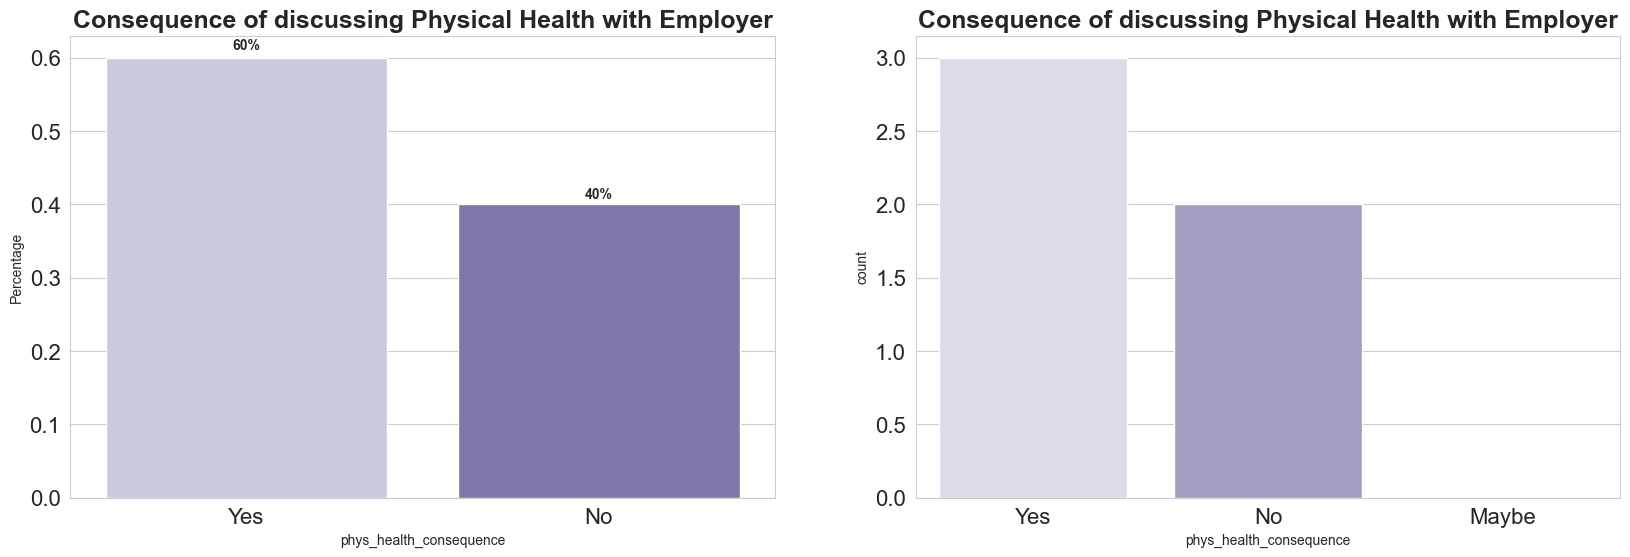

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a DataFrame with sample data
data = {'phys_health_consequence': ['Yes', 'No', 'Yes', 'No', 'Yes']}
df = pd.DataFrame(data)


plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize=True).rename_axis('phys_health_consequence').reset_index(name='Percentage')
ax = sns.barplot(x='phys_health_consequence', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='phys_health_consequence', data=df, palette='Purples', order=['Yes', 'No', 'Maybe'])
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.33999999999999997, '33%')

Text(1.0, 0.33999999999999997, '33%')

Text(2.0, 0.33999999999999997, '33%')

Text(0.5, 1.0, 'Discussing Mental Health with the Coworkers')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

<Axes: >

<Axes: ylabel='coworkers'>

Text(0.5, 1.0, 'Discussing Mental Health with the Coworkers')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

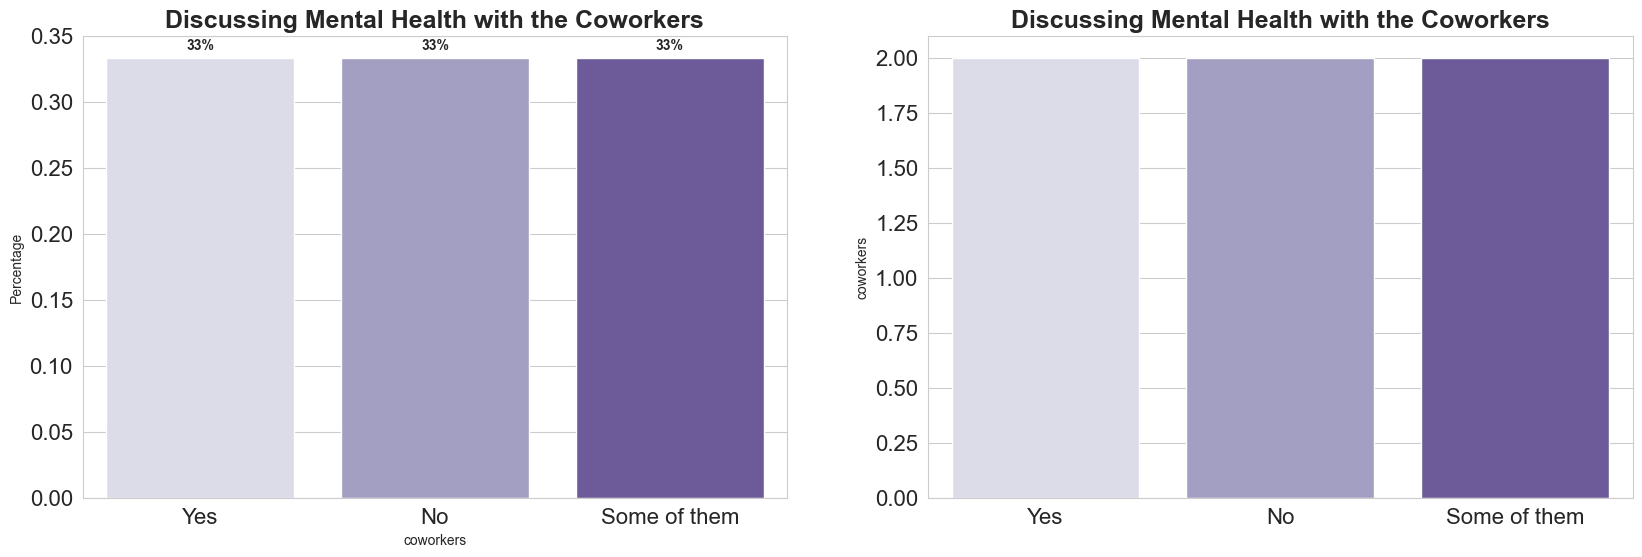

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a DataFrame with sample data
data = {'coworkers': ['Yes', 'No', 'Some of them', 'Yes', 'Some of them', 'No']}
df = pd.DataFrame(data)

# Correcting 'coworkers' column to categorical data type
df['coworkers'] = pd.Categorical(df['coworkers'], categories=['Yes', 'No', 'Some of them'], ordered=True)

plt.figure(figsize=(20, 6))

# Plotting the barplot
plt.subplot(1, 2, 1)
eda_percentage = df['coworkers'].value_counts(normalize=True).rename_axis('coworkers').reset_index(name='Percentage')
ax = sns.barplot(x='coworkers', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Plotting the countplot without hue
plt.subplot(1, 2, 2)
sns.barplot(x=df['coworkers'].value_counts().index, y=df['coworkers'].value_counts(), palette='Purples')
plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.33999999999999997, '33%')

Text(1.0, 0.33999999999999997, '33%')

Text(2.0, 0.33999999999999997, '33%')

Text(0.5, 1.0, 'Discussing Mental Health with the Supervisor')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

<Axes: >

Text(0.0, 0.33999999999999997, '33%')

Text(1.0, 0.33999999999999997, '33%')

Text(2.0, 0.33999999999999997, '33%')

Text(0.5, 1.0, 'Discussing Mental Health with the Interviewer')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

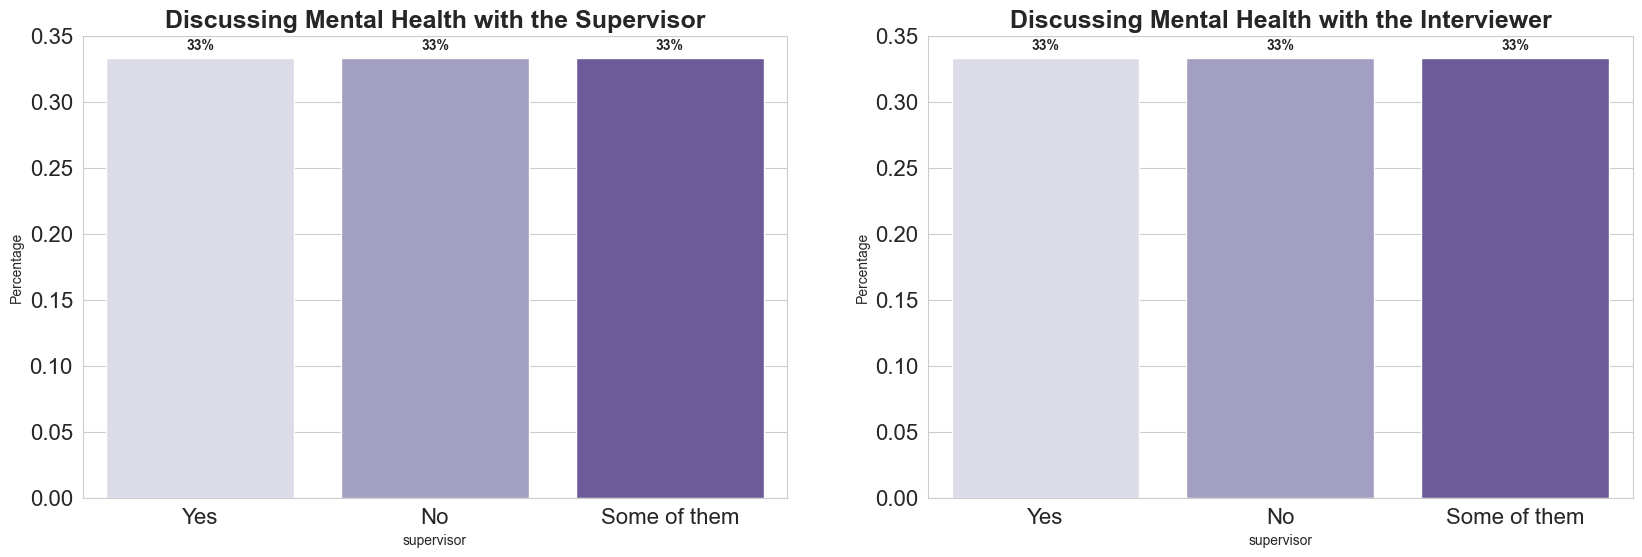

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a DataFrame with sample data
data = {'supervisor': ['Yes', 'No', 'Some of them', 'Yes', 'Some of them', 'No']}
df = pd.DataFrame(data)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['supervisor'].value_counts(normalize=True).rename_axis('supervisor').reset_index(name='Percentage')
ax = sns.barplot(x='supervisor', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage_interview = df['supervisor'].value_counts(normalize=True).rename_axis('supervisor').reset_index(name='Percentage')
ax_interview = sns.barplot(x='supervisor', y='Percentage', data=eda_percentage_interview, palette='Purples')
for p in ax_interview.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_interview.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.33999999999999997, '33%')

Text(1.0, 0.33999999999999997, '33%')

Text(2.0, 0.33999999999999997, '33%')

Text(0.5, 1.0, 'Discussing Mental Health with the Interviewer')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

<Axes: >

<Axes: xlabel='mental_health_interview', ylabel='count'>

Text(0.5, 1.0, 'Discussing Mental Health with the Interviewer')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

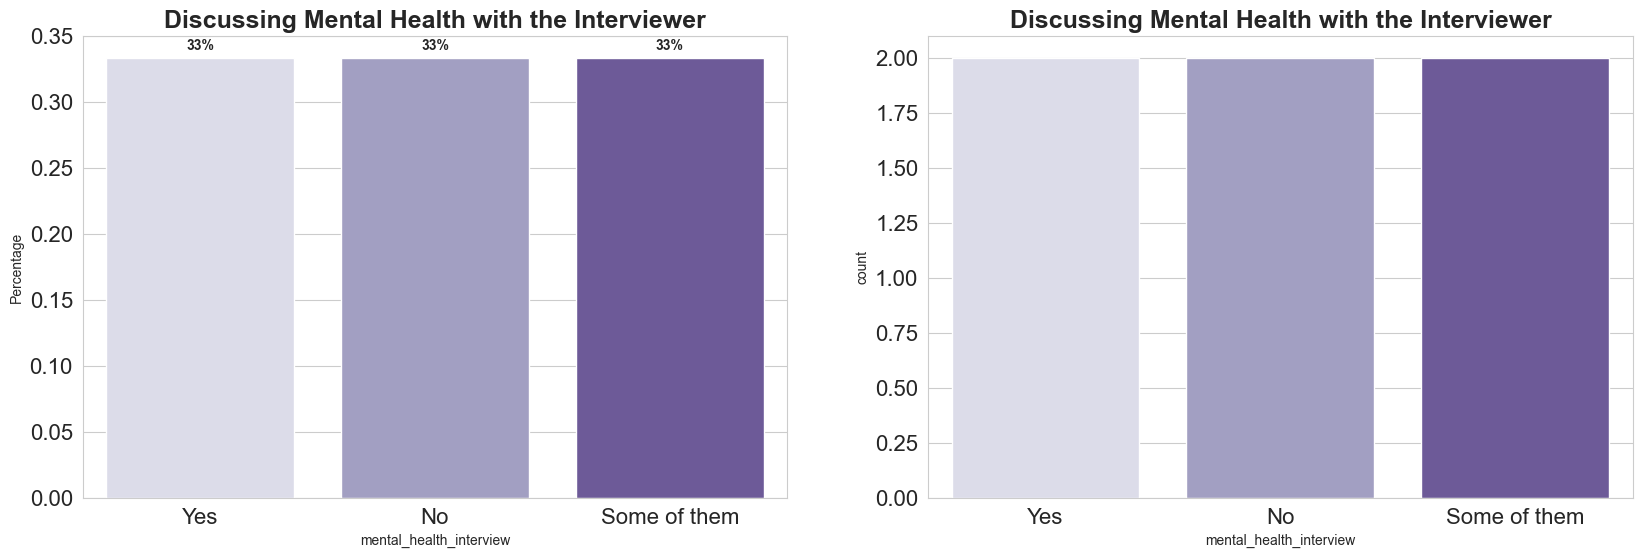

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a DataFrame with sample data
data = {'mental_health_interview': ['Yes', 'No', 'Some of them', 'Yes', 'Some of them', 'No']}
df = pd.DataFrame(data)

plt.figure(figsize=(20, 6))

# Left subplot: Percentage of responses
plt.subplot(1, 2, 1)
eda_percentage = df['mental_health_interview'].value_counts(normalize=True).rename_axis('mental_health_interview').reset_index(name='Percentage')
ax = sns.barplot(x='mental_health_interview', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Right subplot: Count of responses
plt.subplot(1, 2, 2)
sns.countplot(x=df['mental_health_interview'], palette='Purples')
plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.33999999999999997, '33%')

Text(1.0, 0.33999999999999997, '33%')

Text(2.0, 0.33999999999999997, '33%')

Text(0.5, 1.0, 'Discussing Physical Health with the Interviewer')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

<Axes: >

<Axes: xlabel='phys_health_interview', ylabel='count'>

Text(0.5, 1.0, 'Discussing Physical Health with the Interviewer')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

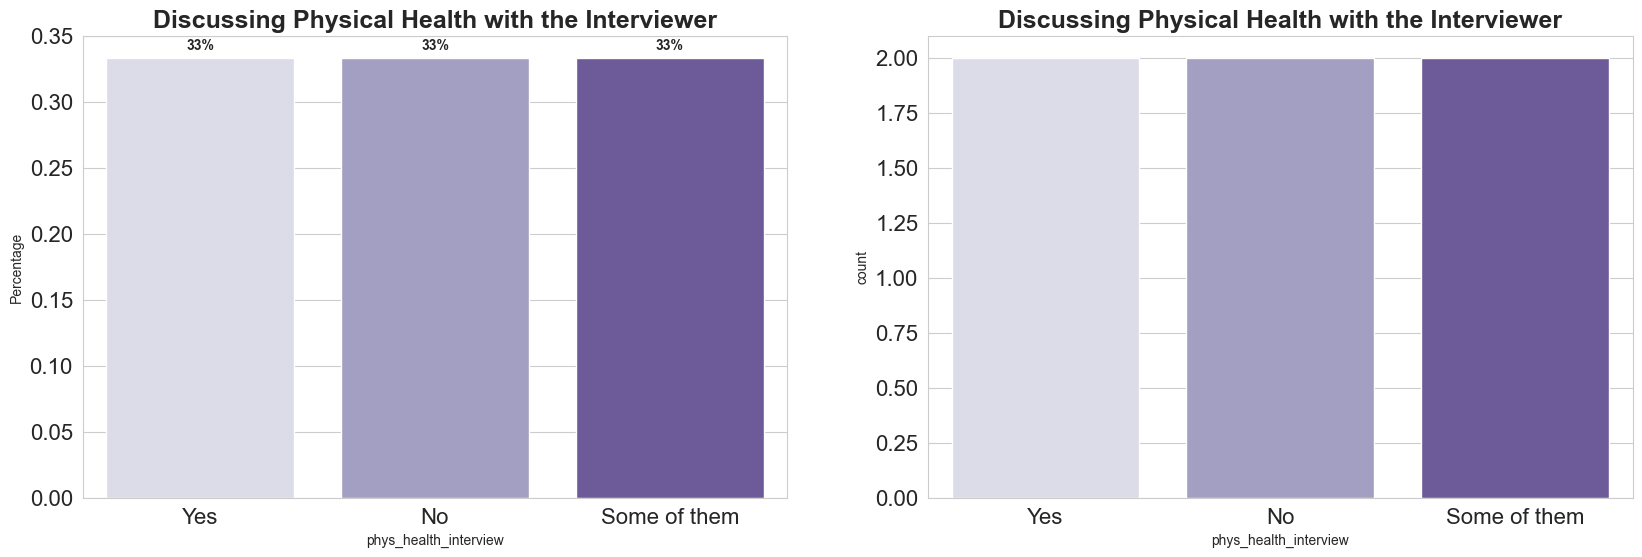

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a DataFrame with sample data
data = {'phys_health_interview': ['Yes', 'No', 'Some of them', 'Yes', 'Some of them', 'No']}
df = pd.DataFrame(data)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_interview'].value_counts(normalize = True).rename_axis('phys_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='phys_health_interview', data=df, palette='Purples')
plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.33999999999999997, '33%')

Text(1.0, 0.33999999999999997, '33%')

Text(2.0, 0.33999999999999997, '33%')

Text(0.5, 1.0, 'Discussing Mental or Physical Health with the Interviewer')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

<Axes: >

<Axes: xlabel='discussion_with_interviewer', ylabel='count'>

Text(0.5, 1.0, 'Discussing Mental or Physical Health with the Interviewer')

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Some of them')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

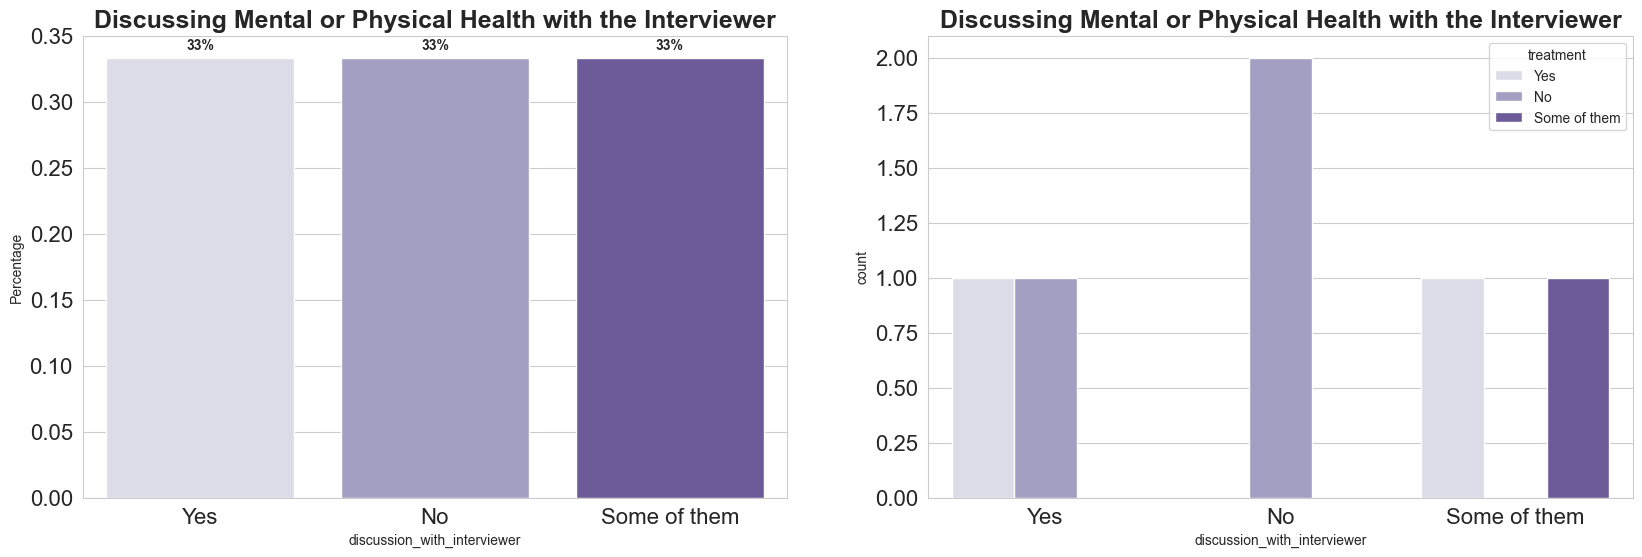

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a DataFrame with sample data
data = {
    'discussion_with_interviewer': ['Yes', 'No', 'Some of them', 'Yes', 'Some of them', 'No'],
    'treatment': ['Yes', 'No', 'Yes', 'No', 'Some of them', 'No']
}
df = pd.DataFrame(data)

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
eda_percentage = df['discussion_with_interviewer'].value_counts(normalize=True).rename_axis('discussion_with_interviewer').reset_index(name='Percentage')
ax = sns.barplot(x='discussion_with_interviewer', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental or Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='discussion_with_interviewer', hue='treatment', data=df, palette='Purples')
plt.title('Discussing Mental or Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<Figure size 2000x600 with 0 Axes>

<Axes: >

Text(0.0, 0.51, '50%')

Text(1.0, 0.51, '50%')

Text(0.5, 1.0, 'Consequence observed for disclosing Mental Health')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

<Axes: >

<Axes: xlabel='obs_consequence', ylabel='count'>

Text(0.5, 1.0, 'Consequence observed for disclosing Mental Health')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

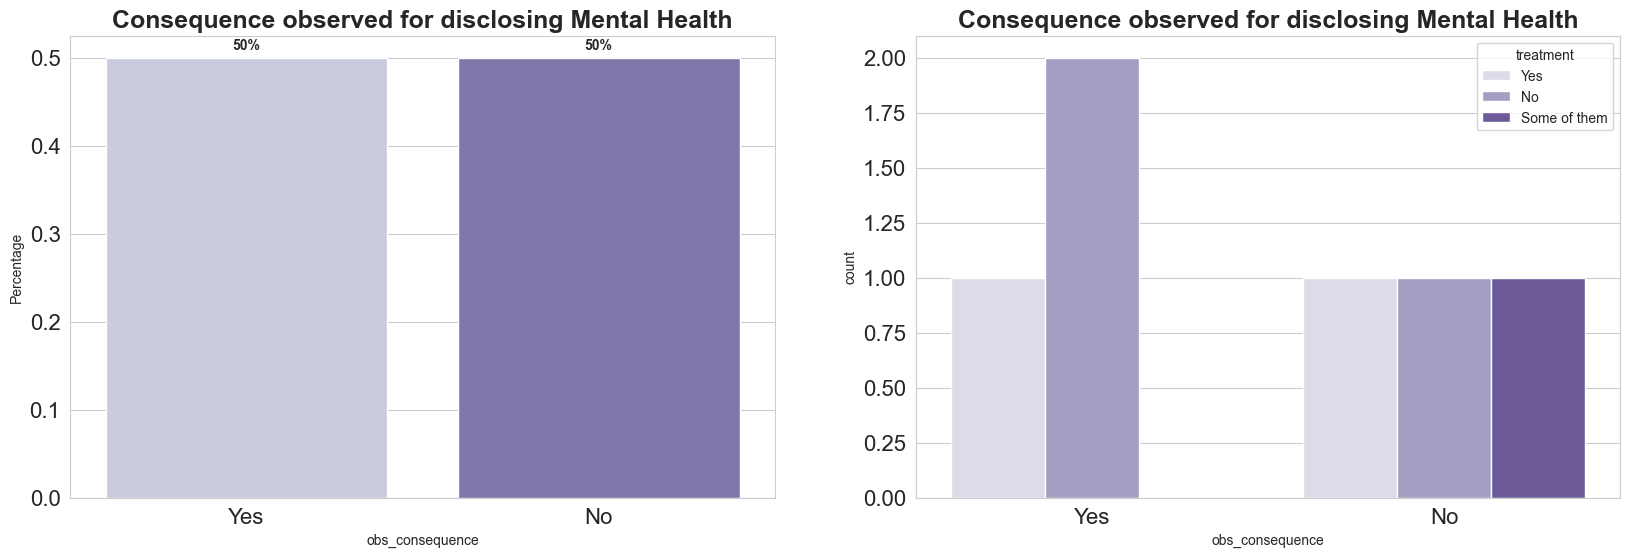

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a DataFrame with sample data
data = {
    'obs_consequence': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
    'treatment': ['Yes', 'No', 'Yes', 'No', 'Some of them', 'No']
}
df = pd.DataFrame(data)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['obs_consequence'].value_counts(normalize=True).rename_axis('obs_consequence').reset_index(name='Percentage')
ax = sns.barplot(x='obs_consequence', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='obs_consequence', hue='treatment', data=df, palette='Purples')
plt.title('Consequence observed for disclosing Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

## Data Preparation

In [61]:
df = pd.read_csv("C:/Users/Susmitha/Downloads/survey.csv")

In [62]:
# Checking if there are any null-values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [63]:
print(df.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [64]:
# Replacing the null-values.
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [65]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [66]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [67]:
# Checking for unique values in every column.
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72] 
GENDER :['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning a

In [68]:
# Since most of the columns except Age column are of object type we perform one-hot encoding.
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [69]:
# Data after one-hot encoding.
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,10,United States,IL,0,0,1,2,4,...,2,1,1,1,2,1,0,2,0,NaN
1,2014-08-27 11:29:37,44,16,United States,IN,0,0,0,3,5,...,0,0,1,0,0,1,1,0,0,NaN
2,2014-08-27 11:29:44,32,20,Canada,NaN,0,0,0,3,4,...,1,1,1,2,2,2,2,1,0,NaN
3,2014-08-27 11:29:46,31,20,United Kingdom,NaN,0,1,1,2,2,...,1,2,2,1,0,0,0,1,1,NaN
4,2014-08-27 11:30:22,31,20,United States,TX,0,0,0,1,1,...,0,1,1,1,2,2,2,0,0,NaN


In [71]:
df['treatment'].value_counts()

1    637
0    622
Name: treatment, dtype: int64

##### We can see that the treatment column which is our target column have almost equal number of values for both the categories which means it is not required to perform any undersampling or oversampling.

In [72]:
# Heatmap
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [73]:
# Creating and Evaluating the models.
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import sklearn

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler 

from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc

ImportError: cannot import name 'Sequence' from 'collections' (C:\Users\Susmitha\anaconda3\Lib\collections\__init__.py)

In [74]:
# Splitting the dataset into train and test datasets.
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [75]:
print(df.columns)

# Replace 'actual_target_column_name' with the correct name of your target column
target_column = 'correct_target_column_name'

# Check if the target column exists in the DataFrame
if target_column not in df.columns:
    print(f"Error: '{target_column}' not found in DataFrame columns.")
else:
    # Split your data into features (X) and target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split your data into training and testing sets
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

    # Now you can train your classifiers
    # For example, let's train a Logistic Regression classifier
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    # Evaluate the classifier
    accuracy = clf.score(X_test, y_test)
    print("Test Accuracy:", accuracy)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
Error: 'correct_target_column_name' not found in DataFrame columns.


In [76]:
df_x = df.drop(columns=['treatment'])
df_y = df['treatment']

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select only numeric columns
numeric_columns = df_x.select_dtypes(include=[np.number]).columns

# Scale only the numeric columns
scaler = StandardScaler()
x_df_scaled = scaler.fit_transform(df_x[numeric_columns])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_df_scaled, df_y, test_size=0.2, random_state=555)

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Assuming x_train, y_train, x_test, y_test are defined earlier

LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators=100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators=100)
BC = BaggingClassifier(n_estimators=100)
GBC = GradientBoostingClassifier(n_estimators=100)
clf_XGB = XGBClassifier(n_estimators=100, seed=555, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(x_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (accuracy_score(clf.predict(x_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.809 (+/- 0.037) [Logistic Regression]
Test Accuracy: 0.7897 
Train CV Accuracy: 0.821 (+/- 0.022) [Random Forest]
Test Accuracy: 0.8214 
Train CV Accuracy: nan (+/- nan) [KNeighbors]


AttributeError: 'NoneType' object has no attribute 'split'

In [87]:
scaler = RobustScaler()
x_df_scaled = scaler.fit_transform(df_x)
x_train, x_test, y_train, y_test = train_test_split(x_df_scaled, df_y)

ValueError: could not convert string to float: '2014-08-27 11:29:31'

In [88]:
import os

# Disable OpenBLAS
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# Your code here
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555,eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, x_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(x_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(x_test), y_test)))

UsageError: Line magic function `%%time` not found.


GradientBoostingClassifier()

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix of Gradient Boost Classifier')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

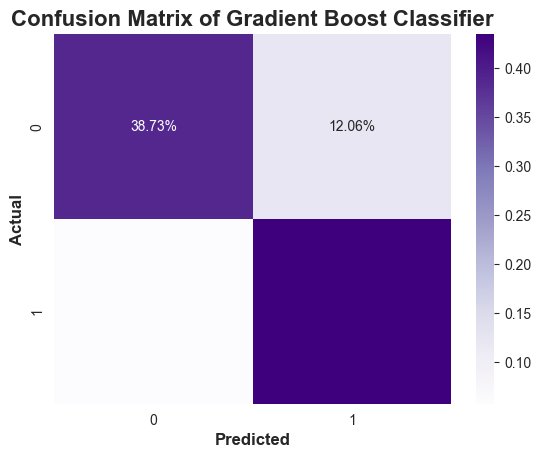

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_df_scaled and df_y are defined
x_train, x_test, y_train, y_test = train_test_split(x_df_scaled, df_y)
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show()

<Figure size 800x800 with 0 Axes>

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0, 'False Positive Rate (1 - Specificity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

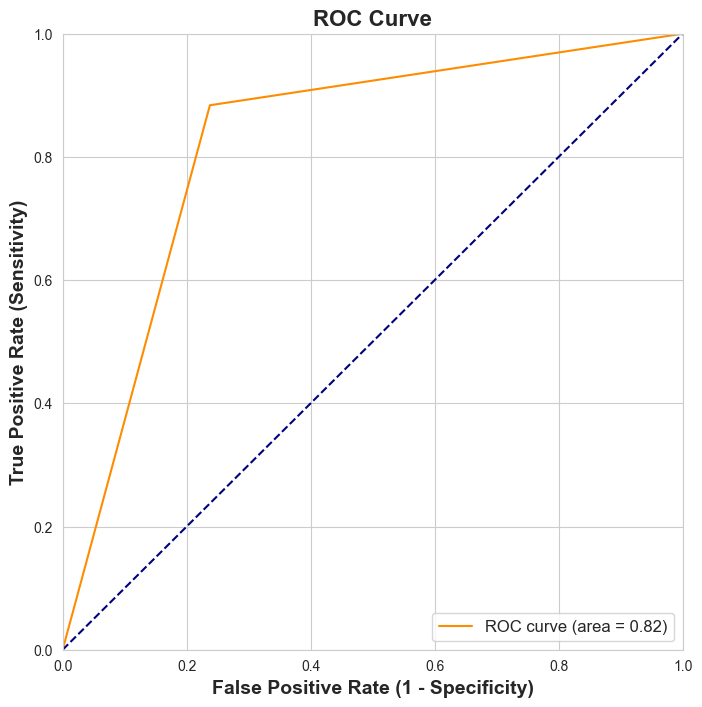

(array([0.    , 0.2375, 1.    ]),
 array([0.        , 0.88387097, 1.        ]),
 array([inf,  1.,  0.]))

In [90]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)